# MCSD2123-01 PERLOMBONGAN DAN ALIRAN DATA BESAR (MASSIVE DATA MINING AND STREAMING)
## Assignment 3 Hierarchical Agglomerative

#### Team Members: -

* Nabila Husna binti Rosli (MCS231009)
* Nur Azimah binti Mohd Salleh (MCS231011)
* Siti Norafizah Binti Ab Aziz (MCS231018)

### Main Objective:

To discover hidden patterns or clusters within your product descriptions that might correspond to meaningful categories (similar to your labeled categories: Electronics, Household, Books, Clothing & Accessories).

## 1.0 Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np

# Plotting Graph
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Feature Engineering - Feature Extraction
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Model Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

## 2.0 Load Data

In [3]:
# Read the CSV file into a DataFrame
df = pd.read_csv('cleaned_data_new.csv')

# Display the first 5 rows of the DataFrame
df.head(5)

,label,text,text_length,tokens,noPunc tokens,noStopW tokens,lemmatized tokens
0,Household,paper plane design framed wall hanging motivat...,1338,"['paper', 'plane', 'design', 'framed', 'wall',...","['paper', 'plane', 'design', 'framed', 'wall',...","['paper', 'plane', 'design', 'framed', 'wall',...",paper plane design framed wall hanging motivat...
1,Household,"saf 'floral' framed painting (wood, 30 inch x ...",346,"['saf', ""'floral"", ""'"", 'framed', 'painting', ...","['saf', 'floral', 'framed', 'painting', 'wood'...","['saf', 'floral', 'framed', 'painting', 'wood'...",saf floral framed painting wood inch x inch sp...
2,Household,saf 'uv textured modern art print framed' pain...,1316,"['saf', ""'uv"", 'textured', 'modern', 'art', 'p...","['saf', 'uv', 'textured', 'modern', 'art', 'pr...","['saf', 'uv', 'textured', 'modern', 'art', 'pr...",saf uv textured modern art print framed painti...
3,Household,"saf flower print framed painting (synthetic, 1...",1091,"['saf', 'flower', 'print', 'framed', 'painting...","['saf', 'flower', 'print', 'framed', 'painting...","['saf', 'flower', 'print', 'framed', 'painting...",saf flower print framed painting synthetic inc...
4,Household,incredible gifts india wooden happy birthday u...,989,"['incredible', 'gifts', 'india', 'wooden', 'ha...","['incredible', 'gifts', 'india', 'wooden', 'ha...","['incredible', 'gifts', 'india', 'wooden', 'ha...",incredible gift india wooden happy birthday un...


In [4]:
df.shape

(27802, 7)

50424 rows: This represents the number of data points (descriptions + reviews) in the dataset.

9 columns: These columns likely contain features or information associated with each review/description.

## 5.0 Feature Engineering

### 5.1 Vectorization using TF-IDF

We use TF-IDF to change our text into numbers that ML can understand better. TF-IDF will looks at how often the words appear in each piece of text (description) and across all the texts (descriptions). Words that appear a lot in one piece of text but not in many others get higher numbers, showing they are more important for telling texts apart. 

In [5]:
# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=10000)  # Limit the number of features
X = vectorizer.fit_transform(df['lemmatized tokens'])

# Print the shape of the transformed datasets to understand the feature space
print(f'Shape of TF-IDF transformed data: {X.shape}')

Shape of TF-IDF transformed data: (27802, 10000)


### 5.2 Reduced Dimensionality

Since there is computational limitation, the dimensionality of the data are reduced using PCA. The set dimensionality is 2.

In [6]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import numpy as np

# Assuming X is your data matrix
sample_indices = np.random.choice(X.shape[0], size=10000, replace=False)
X_sampled = X[sample_indices]

# Use TruncatedSVD for dimensionality reduction
svd = TruncatedSVD(n_components=100)
X_reduced = svd.fit_transform(X_sampled)

# Apply PCA to reduce the SVD-transformed data to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_reduced)

### 5.3 Dendogram Visualisation

The dendogram are created to get the visualisation of the group of cluster. The two method used are Complete method and Ward method.The Ward method will produce more concise dendrogram as the target is to have a less variance between the cluster.

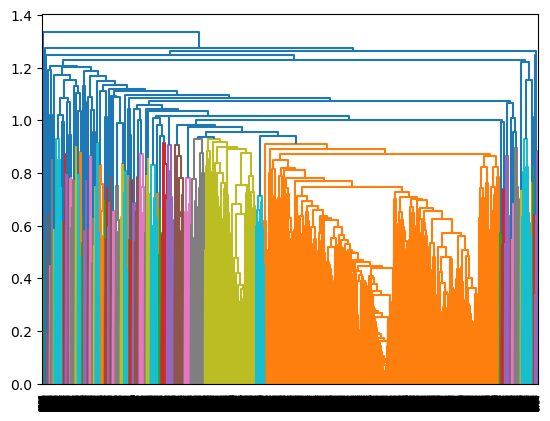

In [8]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Apply linkage and plot dendrogram
link = linkage(X_reduced, method='complete')
dendrogram(link)
plt.show()

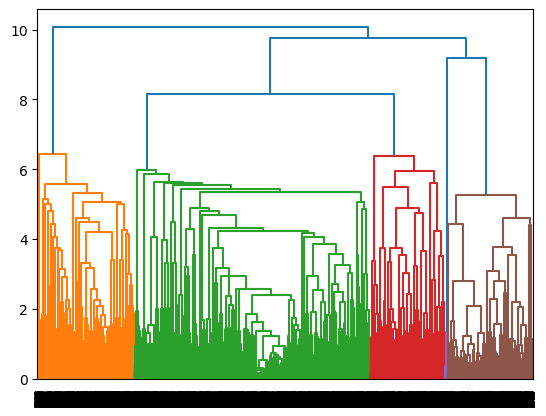

In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Apply linkage and plot dendrogram
link = linkage(X_reduced, method='ward')
dendrogram(link)
plt.show()

### 5.4 Sillhoutte Score

In [20]:
# Define the range of clusters
range_n_clusters = [4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # Initialize AgglomerativeClustering
    agc = AgglomerativeClustering(n_clusters=num_clusters, metric='euclidean', linkage='ward')
    
    # Fit and predict clusters
    cluster_labels = agc.fit_predict(X_pca)
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print(f'For n_clusters={num_clusters}, the silhouette score is {silhouette_avg:.4f}')

For n_clusters=4, the silhouette score is 0.4796
For n_clusters=5, the silhouette score is 0.4930
For n_clusters=6, the silhouette score is 0.4839
For n_clusters=7, the silhouette score is 0.4611
For n_clusters=8, the silhouette score is 0.4271


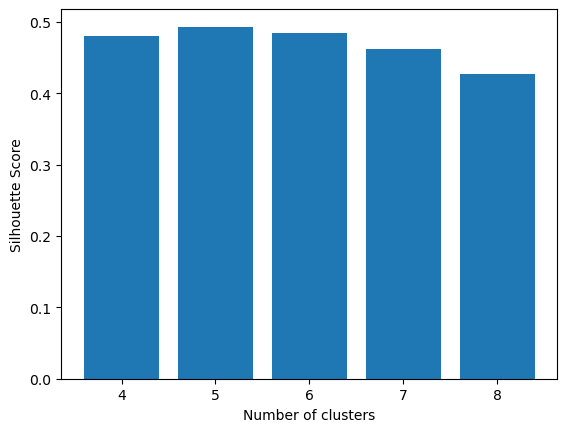

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# Example dataset
# X_pca = ... (Your PCA transformed data)

# Compute silhouette scores for n_clusters from 4 to 8
silhouette_scores = []
for n_cluster in range(4, 9):
    labels = AgglomerativeClustering(n_clusters=n_cluster).fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    silhouette_scores.append(score)

# Specify the range of n_clusters corresponding to the computed silhouette scores
k = range(4, 9)

# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize=10)
plt.ylabel('Silhouette Score', fontsize=10)
plt.show()


### 5.5 Applying the Hierarchical Agglomerative

In [17]:
from sklearn.cluster import AgglomerativeClustering

# Perform Agglomerative Clustering
agc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
labels = agc.fit_predict(X_pca)  # Using the 2D PCA-reduced data

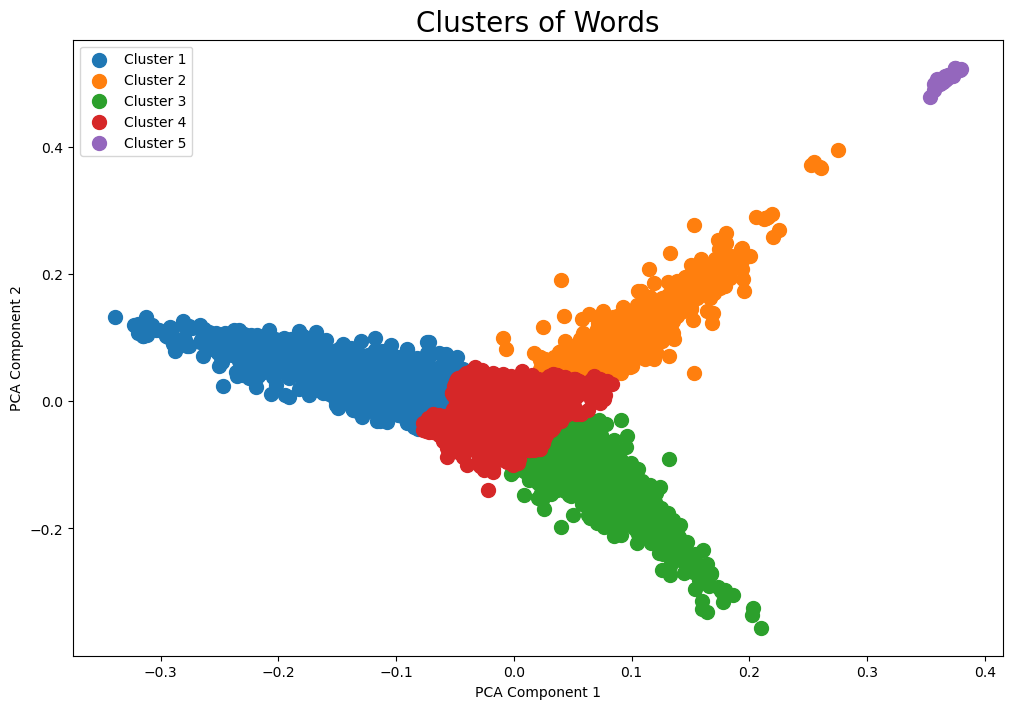

In [18]:
# Plotting the clusters
plt.figure(figsize=(12, 8))

# Create scatter plots for each cluster
for i in range(5):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i + 1}', s=100)

# Customize the plot
plt.legend(loc='best')
plt.title('Clusters of Words', fontsize=20)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()